In [21]:
# Cite:
# https://github.com/PharmCat/MvNormalCDF.jl

In [22]:
# import packages
using Distributions, Random, MvNormalCDF
using Query, Plots, StatsPlots
using DataFrames, CSV, Dates

In [23]:
now()

2023-03-14T01:30:11.468

Define the functions

In [24]:
# Example functions of deltap: from the investment to the value brought by the developers

function deltap_a(c_0_a)
    2 * c_0_a
end

function deltap_b(c_0_b)
    2 * c_0_b
end

deltap_b (generic function with 1 method)

In [25]:
# Example functionality of softwares

function theta_func(theta_1_bar_a, c_0_a)
    theta_1_bar_a + deltap_a(c_0_a) # baseline quality + added value
end    # in Julia function "deltap_a" has been in memory

theta_func (generic function with 1 method)

In [26]:
# Example utility function of customer

function util(u_bar_a, x_1, y_1, theta_1, c_0_a, p_s_a)
    u_bar_a + x_1 * theta_1 + y_1 * c_0_a - p_s_a
end

util (generic function with 1 method)

In [27]:
# Example total cost

function c_total_a(c_0_a, m, c_res_a)
    deltap_a(c_0_a) + m * c_res_a
end

c_total_a (generic function with 1 method)

In [28]:
# Example functions of profits of owners (firms a and b)

function profit_a(m, price_s_a, c_0_a, c_res_a)
    m * price_s_a - c_total_a(c_0_a, m, c_res_a) 
end

profit_a (generic function with 1 method)

Joint distribution of customers

In [29]:
# By now we assume that both follow normal distributions
# x ~ N(0.8, 0.05) # tbd: evidence?
# y ~ N(0, 0.05)
# Joint dist.: correlation = 0 # tbd: evidence?
# Draw the bivariate joint dist.
mu = [0.8; 0];
sigma = [0.05^2 0; 0 0.2^2];
dist01 = MvNormal(mu, sigma);

In [30]:
# Bivariate dist.
a = [0; -1]
b = [1; 1]
# m: number of integration points (default 1000*dimension)
(p,e) = mvnormcdf(mu, sigma, a, b; m = 2000) # Multivariate Normal probability integral

(0.9999677554731808, 0.0)

In [31]:
# Sampling
Random.seed!(123);
rand_sample01 = rand(dist01,10000)';

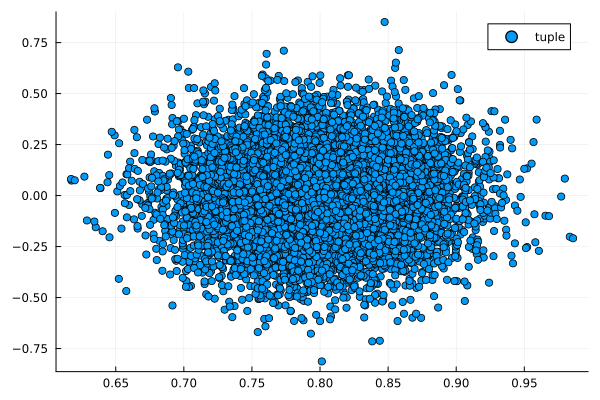

In [32]:
# rand_sample01[1000,:] # select a tuple
# rand_sample01[:,1] # select all x
# x = range(0, 10, length=100)
x = rand_sample01[:,1]
y = rand_sample01[:,2]
plot(x, y, seriestype=:scatter, label="tuple")

In [33]:
# Check range: should be restricted to the range [0,1] and [-1,1]
[minimum(x), maximum(x), minimum(y), maximum(y)]

4-element Vector{Float64}:
  0.6172028608386589
  0.9858654339081019
 -0.813039339188321
  0.8510298651286213

In [34]:
# Save the sample values
rand_sample01

10000×2 adjoint(::Matrix{Float64}) with eltype Float64:
 0.840414  -0.224415
 0.744768  -0.0833985
 0.814379   0.0459637
 0.778912  -0.271118
 0.803473  -0.0234646
 0.860964   0.0585829
 0.798443   0.0631666
 0.691881  -0.178015
 0.842712   0.0683564
 0.784056  -0.0674909
 0.900406   0.153006
 0.809013   0.405782
 0.793618   0.0938954
 ⋮         
 0.859155   0.177624
 0.839371  -0.162095
 0.769805  -0.0904791
 0.720644  -0.053009
 0.82376   -0.365925
 0.813556  -0.22601
 0.781796   0.00618603
 0.789498   0.034438
 0.855998  -0.025473
 0.791163  -0.428199
 0.826378  -0.196006
 0.761677   0.0464378

In [35]:
df_rand_sample01 = DataFrame(s = x, 
               st_R = y)

Row,s,st_R
,Float64,Float64
1,0.840414,-0.224415
2,0.744768,-0.0833985
3,0.814379,0.0459637
4,0.778912,-0.271118
5,0.803473,-0.0234646
6,0.860964,0.0585829
7,0.798443,0.0631666
8,0.691881,-0.178015
9,0.842712,0.0683564


In [36]:
# CSV.write("C:\\Users\\zwang3\\Downloads\\rand_sample01.csv", df_rand_sample01)

Check the scenarios

In [37]:
# CSV.read("C:\\Users\\zwang3\\Downloads\\rand_sample01.csv", DataFrame) #; delim=","
# tbd: Check this again.

In [38]:
# One certain setup

# policy factor: data restriction
c_res_a = 5; c_res_b = 5

# cost of contract # strange picture. Check (6,20)
c_0_a = 60; c_0_b = 60

# fundamental 
theta_1_bar_a_value = 0.8; theta_1_bar_b_value = 0.8

# functionality
theta_1_value_a = theta_func(theta_1_bar_a_value, c_0_a)
theta_1_value_b = theta_func(theta_1_bar_b_value, c_0_b)

# utility constant
u_bar_a = 100; u_bar_b = 100;

# number of customers
n_customers = 10000;

In [39]:
# check Consumers' tastes
s = x; 
st_R = y;

# reserved utility
ru = 50; # homogenous

In [40]:
# Above checked
ru

50

The algo. below shows for every given price of Owner $a$, the best response price of Owner $b$.

In [254]:
timest1 = now() # estimate the run time

2023-03-07T15:54:16.777

In [255]:
Random.seed!(123);

pricelist1 = []
maxpricelist1 = [] # track the best response of b

for jj in range(1, 100)

    price_s_a = jj # Under certain price jj, check the best response of b
    pricelist1 = []
    
    for ii in range(1, 100)

        price_s_b = ii

        # Trial: Utility
        utili_a = []
        utili_b = []
        for i in range(1, n_customers)
            append!(utili_a, util(u_bar_a, s[i], st_R[i], theta_1_value_a, c_res_a, price_s_a))
            append!(utili_b, util(u_bar_b, s[i], st_R[i], theta_1_value_b, c_res_b, price_s_b))
        end

        # buy randomly from one company if the utilities are the same
        dist_bin = Binomial(1, 0.5); # (n,p)
        bin = rand(dist_bin, n_customers)';

        # count the numbers of purchase: buy - from a; buy2 - from b;
        buy = []; buy2 = [];

        for j in range(1, n_customers)
            if ru <= max(utili_a[j], utili_b[j])
                if utili_a[j] > utili_b[j]
                    append!(buy, 1);
                elseif utili_a[j] < utili_b[j]
                    append!(buy2, 1);
                else
                    append!(buy, bin[j]);
                    append!(buy2, 1-bin[j]);
                end
            else
            end
        end

        # Count the purchases
        append!(buy, 0) # get rid of Any([])
        append!(buy2, 0)

        m1 = sum(buy)
        m2 = sum(buy2)
        pr1 = profit_a(m1, price_s_a, c_0_a, c_res_a)
        pr2 = profit_a(m2, price_s_b, c_0_b, c_res_b)

        append!(pricelist1, pr2)

    end

    # Find which price could bring the maximum profit
    indx = minimum(findall(x -> x == maximum(pricelist1), pricelist1))
    append!(maxpricelist1, range(1, 100)[indx])
    
end

In [256]:
timest2 = now();
timest2 - timest1

555945 milliseconds

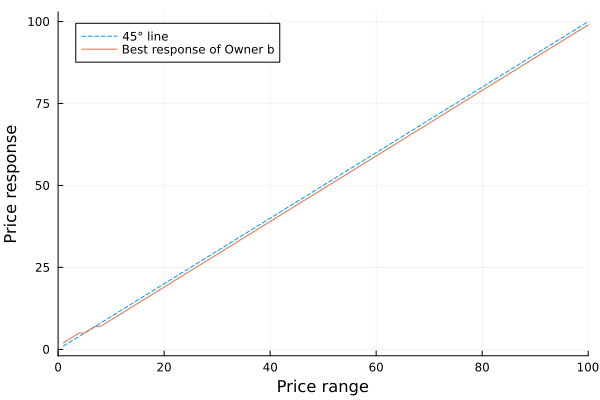

In [267]:
plot(1:100, 1:100, label = "45° line", ls=:dash)
plot!(1:100, maxpricelist1, label = "Best response of Owner b", lw=1)
# plot!(legend=:outerbottom, legendcolumns=3)
xlims!(0, 100)
# title!("Trigonometric functions")
xlabel!("Price range")
ylabel!("Price response")

In [313]:
png("Best response of Owner b - Symmetric")

"Best response of Owner b - Symmetric.png"

In [260]:
# Find equil. prices
df_equil = DataFrame(price_a = 1:100, price_b_br = maxpricelist1);

In [265]:
# Find the common elements at the same position
list1 = df_equil[!,"price_a"]
list2 = df_equil[!,"price_b_br"]
equil = []
for i in eachindex(list1)
    if list1[i] == list2[i]
        push!(equil, list1[i])
    end
end
equil

3-element Vector{Any}:
 5
 6
 7

We observed under (c_0_a, c_0_b) = (60, 60), the largest equilibrium price (7, 7) brings the largest profit for Owner b. If we assume it's always the largest equilibrium price brings the largest profit for Owner b, then we keep this price.

In [284]:
equil[length(equil)]

7

In [285]:
c_0_a, c_0_b
# Track the profits under the equilibria under each situation.

(60, 60)

Check the values

In [327]:
c_0_a = 0; c_0_b = 0;

price_s_a = 7; price_s_b = 7;

Random.seed!(123);

# Trial: Utility
utili_a = []
utili_b = []
for i in range(1, n_customers)
    append!(utili_a, util(u_bar_a, s[i], st_R[i], theta_1_value_a, c_res_a, price_s_a))
    append!(utili_b, util(u_bar_b, s[i], st_R[i], theta_1_value_b, c_res_b, price_s_b))
end

# buy randomly from one company if the utilities are the same
dist_bin = Binomial(1, 0.5); # (n,p)
bin = rand(dist_bin, n_customers)';

# count the numbers of purchase: buy - from a; buy2 - from b;
buy = []; buy2 = []; welf = [];

for j in range(1, n_customers)
    if ru <= max(utili_a[j], utili_b[j])
        if utili_a[j] > utili_b[j]
            append!(buy, 1);
            append!(welf, utili_a[j]);
        elseif utili_a[j] < utili_b[j]
            append!(buy2, 1);
            append!(welf, utili_b[j]);
        else
            append!(buy, bin[j]);
            append!(buy2, 1-bin[j]);
            append!(welf, utili_a[j]);
        end
    else
    end
end

# Count the purchases
append!(buy, 0) # get rid of Any([])
append!(buy2, 0)

# Objective functions regarding the global welfare
agg_total_cost = deltap_a(c_0_a) + m1 * c_res_a + deltap_a(c_0_b) + m2 * c_res_b
agg_welfare = sum(welf) - agg_total_cost

m1 = sum(buy);
m2 = sum(buy2);
pr1 = profit_a(m1, price_s_a, c_0_a, c_res_a);
pr2 = profit_a(m2, price_s_b, c_0_b, c_res_b);
agg_welfare

1.8458001444280182e6

In [328]:
c_0_b, pr2, agg_welfare

(0, 10030, 1.8458001444280182e6)

In [306]:
# adding triples and operations
trial = [0 0 0]
# append!(trial, (c_0_b; pr2; agg_welfare))

1×3 Matrix{Int64}:
 0  0  0

In [308]:
trial = vcat(trial, [c_0_b pr2 agg_welfare])

3×3 Matrix{Float64}:
  0.0     0.0  0.0
 60.0  9876.0  1.84556e6
 60.0  9876.0  1.84556e6

Given different investment tuples, get the price equilibria, the profits and the welfare under the price equilibria.

In [314]:
# Trial: (c_0_a, c_0_b) = (0, 0)
c_0_a = 0; c_0_b = 0;

Random.seed!(123);

pricelist1 = []
maxpricelist1 = [] # track the best response of b

for jj in range(1, 100)

    price_s_a = jj # Under certain price jj, check the best response of b
    pricelist1 = []
    
    for ii in range(1, 100)

        price_s_b = ii

        # Trial: Utility
        utili_a = []
        utili_b = []
        for i in range(1, n_customers)
            append!(utili_a, util(u_bar_a, s[i], st_R[i], theta_1_value_a, c_res_a, price_s_a))
            append!(utili_b, util(u_bar_b, s[i], st_R[i], theta_1_value_b, c_res_b, price_s_b))
        end

        # buy randomly from one company if the utilities are the same
        dist_bin = Binomial(1, 0.5); # (n,p)
        bin = rand(dist_bin, n_customers)';

        # count the numbers of purchase: buy - from a; buy2 - from b;
        buy = []; buy2 = [];

        for j in range(1, n_customers)
            if ru <= max(utili_a[j], utili_b[j])
                if utili_a[j] > utili_b[j]
                    append!(buy, 1);
                elseif utili_a[j] < utili_b[j]
                    append!(buy2, 1);
                else
                    append!(buy, bin[j]);
                    append!(buy2, 1-bin[j]);
                end
            else
            end
        end

        # Count the purchases
        append!(buy, 0) # get rid of Any([])
        append!(buy2, 0)

        m1 = sum(buy)
        m2 = sum(buy2)
        pr1 = profit_a(m1, price_s_a, c_0_a, c_res_a)
        pr2 = profit_a(m2, price_s_b, c_0_b, c_res_b)

        append!(pricelist1, pr2)

    end

    # Find which price could bring the maximum profit
    indx = minimum(findall(x -> x == maximum(pricelist1), pricelist1))
    append!(maxpricelist1, range(1, 100)[indx])
    
end

In [315]:
# Find equil. prices
df_equil = DataFrame(price_a = 1:100, price_b_br = maxpricelist1);

In [316]:
# Find the common elements at the same position
list1 = df_equil[!,"price_a"]
list2 = df_equil[!,"price_b_br"]
equil = []
for i in eachindex(list1)
    if list1[i] == list2[i]
        push!(equil, list1[i])
    end
end
equil

3-element Vector{Any}:
 5
 6
 7

In [317]:
equil[length(equil)]

7

In [318]:
price_s_a = equil[length(equil)]; price_s_b = equil[length(equil)];

# Trial: Utility
utili_a = []
utili_b = []
for i in range(1, n_customers)
    append!(utili_a, util(u_bar_a, s[i], st_R[i], theta_1_value_a, c_res_a, price_s_a))
    append!(utili_b, util(u_bar_b, s[i], st_R[i], theta_1_value_b, c_res_b, price_s_b))
end

# buy randomly from one company if the utilities are the same
dist_bin = Binomial(1, 0.5); # (n,p)
bin = rand(dist_bin, n_customers)';

# count the numbers of purchase: buy - from a; buy2 - from b;
buy = []; buy2 = []; welf = [];

for j in range(1, n_customers)
    if ru <= max(utili_a[j], utili_b[j])
        if utili_a[j] > utili_b[j]
            append!(buy, 1);
            append!(welf, utili_a[j]);
        elseif utili_a[j] < utili_b[j]
            append!(buy2, 1);
            append!(welf, utili_b[j]);
        else
            append!(buy, bin[j]);
            append!(buy2, 1-bin[j]);
            append!(welf, utili_a[j]);
        end
    else
    end
end

# Count the purchases
append!(buy, 0) # get rid of Any([])
append!(buy2, 0)

# Objective functions regarding the global welfare
agg_total_cost = deltap_a(c_0_a) + m1 * c_res_a + deltap_a(c_0_b) + m2 * c_res_b
agg_welfare = sum(welf) - agg_total_cost

m1 = sum(buy);
m2 = sum(buy2);
pr1 = profit_a(m1, price_s_a, c_0_a, c_res_a);
pr2 = profit_a(m2, price_s_b, c_0_b, c_res_b);

# Show the triple
(c_0_b, equil[length(equil)], pr2, agg_welfare)

(0, 7, 10036, 1.8458001444280182e6)

Idea of the second step of backward induction: Find the investment tuples on the diagonal, and then find grids nearby.

In [41]:
c_res_a = 0; c_res_b = 5;

In [42]:
# Check again the regulations
c_res_a, c_res_b

(0, 5)

In [43]:
timest1 = now() # estimate the run time

# For different investment tuples on the diagonal: (0,0), (10, 10), (20, 20), ..., (100, 100).
trial = [0 0 0 0]

for inv in 0:10:100

#     c_0_a = inv; c_0_b = inv; # Symmetric
    c_0_a = inv; c_0_b = inv + 20; # How asymmetric?

    Random.seed!(123);

    pricelist1 = []
    maxpricelist1 = [] # track the best response of b

    for jj in range(1, 100)

        price_s_a = jj # Under certain price jj, check the best response of b
        pricelist1 = []

        for ii in range(1, 100)

            price_s_b = ii

            # Trial: Utility
            utili_a = []
            utili_b = []
            for i in range(1, n_customers)
                append!(utili_a, util(u_bar_a, s[i], st_R[i], theta_1_value_a, c_res_a, price_s_a))
                append!(utili_b, util(u_bar_b, s[i], st_R[i], theta_1_value_b, c_res_b, price_s_b))
            end

            # buy randomly from one company if the utilities are the same
            dist_bin = Binomial(1, 0.5); # (n,p)
            bin = rand(dist_bin, n_customers)';

            # count the numbers of purchase: buy - from a; buy2 - from b;
            buy = []; buy2 = [];

            for j in range(1, n_customers)
                if ru <= max(utili_a[j], utili_b[j])
                    if utili_a[j] > utili_b[j]
                        append!(buy, 1);
                    elseif utili_a[j] < utili_b[j]
                        append!(buy2, 1);
                    else
                        append!(buy, bin[j]);
                        append!(buy2, 1-bin[j]);
                    end
                else
                end
            end

            # Count the purchases
            append!(buy, 0) # get rid of Any([])
            append!(buy2, 0)

            m1 = sum(buy)
            m2 = sum(buy2)
            pr1 = profit_a(m1, price_s_a, c_0_a, c_res_a)
            pr2 = profit_a(m2, price_s_b, c_0_b, c_res_b)

            append!(pricelist1, pr2)

        end

        # Find which price could bring the maximum profit
        indx = minimum(findall(x -> x == maximum(pricelist1), pricelist1))
        append!(maxpricelist1, range(1, 100)[indx])

    end

    # Find equil. prices
    df_equil = DataFrame(price_a = 1:100, price_b_br = maxpricelist1);

    # Find the common elements at the same position
    list1 = df_equil[!,"price_a"]
    list2 = df_equil[!,"price_b_br"]
    equil = []
    for i in eachindex(list1)
        if list1[i] == list2[i]
            push!(equil, list1[i])
        end
    end

    # Plug in the equilibrium prices

    price_s_a = equil[length(equil)]; price_s_b = equil[length(equil)];

    # Trial: Utility
    utili_a = []
    utili_b = []
    for i in range(1, n_customers)
        append!(utili_a, util(u_bar_a, s[i], st_R[i], theta_1_value_a, c_res_a, price_s_a))
        append!(utili_b, util(u_bar_b, s[i], st_R[i], theta_1_value_b, c_res_b, price_s_b))
    end

    # buy randomly from one company if the utilities are the same
    dist_bin = Binomial(1, 0.5); # (n,p)
    bin = rand(dist_bin, n_customers)';

    # count the numbers of purchase: buy - from a; buy2 - from b;
    buy = []; buy2 = []; welf = [];

    for j in range(1, n_customers)
        if ru <= max(utili_a[j], utili_b[j])
            if utili_a[j] > utili_b[j]
                append!(buy, 1);
                append!(welf, utili_a[j]);
            elseif utili_a[j] < utili_b[j]
                append!(buy2, 1);
                append!(welf, utili_b[j]);
            else
                append!(buy, bin[j]);
                append!(buy2, 1-bin[j]);
                append!(welf, utili_a[j]);
            end
        else
        end
    end

    # Count the purchases
    append!(buy, 0) # get rid of Any([])
    append!(buy2, 0)

    # Objective functions regarding the global welfare
    agg_total_cost = deltap_a(c_0_a) + m1 * c_res_a + deltap_a(c_0_b) + m2 * c_res_b
    agg_welfare = sum(welf) - agg_total_cost

    m1 = sum(buy);
    m2 = sum(buy2);
    pr1 = profit_a(m1, price_s_a, c_0_a, c_res_a);
    pr2 = profit_a(m2, price_s_b, c_0_b, c_res_b);

    # Show the triple
#     (c_0_b, equil[length(equil)], pr2, agg_welfare)

    # adding triples and operations: investment, price_b, profit_b, welfare
    trial = vcat(trial, [c_0_b equil[length(equil)] pr2 agg_welfare]) 
    
end # The run time could be 9 min * 11 = 99 min.

In [44]:
timest2 = now() # estimate the run time
timest2 - timest1 # 74.1 min - 2.3 hours

8227912 milliseconds

In [45]:
trial

12×4 Matrix{Float64}:
   0.0  0.0     0.0  0.0
  20.0  7.0  9874.0  1.87565e6
  30.0  7.0  9854.0  1.87561e6
  40.0  7.0  9834.0  1.87557e6
  50.0  7.0  9814.0  1.87553e6
  60.0  7.0  9794.0  1.87549e6
  70.0  7.0  9774.0  1.87545e6
  80.0  7.0  9754.0  1.87541e6
  90.0  7.0  9734.0  1.87537e6
 100.0  7.0  9714.0  1.87533e6
 110.0  7.0  9694.0  1.87529e6
 120.0  7.0  9674.0  1.87525e6

In [46]:
trial_values = trial[2:12, :];
trial_values[:, 1]

11-element Vector{Float64}:
  20.0
  30.0
  40.0
  50.0
  60.0
  70.0
  80.0
  90.0
 100.0
 110.0
 120.0

In [47]:
df_equil_new01 = DataFrame(c_0_b = trial_values[:, 1], 
    p_b = trial_values[:, 2], profit_b = trial_values[:, 3], agg_welfare = trial_values[:, 4])

Row,c_0_b,p_b,profit_b,agg_welfare
,Float64,Float64,Float64,Float64
1,20.0,7.0,9874.0,1.87565e6
2,30.0,7.0,9854.0,1.87561e6
3,40.0,7.0,9834.0,1.87557e6
4,50.0,7.0,9814.0,1.87553e6
5,60.0,7.0,9794.0,1.87549e6
6,70.0,7.0,9774.0,1.87545e6
7,80.0,7.0,9754.0,1.87541e6
8,90.0,7.0,9734.0,1.87537e6
9,100.0,7.0,9714.0,1.87533e6


In [48]:
CSV.write("C:\\Users\\think\\Downloads\\df_equil_new15_cres_asym_at_0_5.csv", df_equil_new01)

"C:\\Users\\think\\Downloads\\df_equil_new15_cres_asym_at_0_5.csv"